In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
def L_e(r_d,nu,Q,T,B_n):
    l=35*(1/r_d)**2*(1.0E6/nu)*(T)*(1.0E-16/B_n)**2
    return l

In [3]:
def N_d(L_c,L_m,L_e,r_d,a): 
    ksi=4*np.pi*1.0E-7*r_d*(np.log(8*r_d/a)-2)*1.0E6
    num1=np.sqrt(1+L_e/ksi)-1
    num2=N_l*L_m+L_c
    denom=L_e/ksi-(np.sqrt(1+L_e/ksi)-1)
    frac=num1*num2/denom
    n=np.sqrt(frac/ksi)
    return n

In [4]:
def I_T(nu,L,Q,T,Delta_nu):
    i=2.96E-13*np.sqrt((1.0E6/nu)*(1/L)*(Q/1.0E4)*T*Delta_nu)
    return i

In [5]:
def I_B(N_d,r_d,B_n,Delta_nu):
    return 5.03E-14*(1/N_d)*r_d*(B_n/(1.0E-16))*np.sqrt(Delta_nu)

In [6]:
def I(Q,L,N_l,g,E_o,rho,r_e,d,l):
    return 2.34E-16*(Q/1.0E4)*(1/L)*N_l*(g/1.0E-12)*(E_o/10)*np.sqrt(rho)*r_e**2*d*np.log(1+l/r_e)

In [7]:
#function for graphing g
def g(nu,L,Q,T,Delta_nu,rho,E_o,d,r_e,N_l,l,N_d,r_d,B_n):
    deltaI_T=I_T(nu,L,Q,T,Delta_nu)
    deltaI_B=I_B(N_d,r_d,B_n,Delta_nu)
    denom=(2.34E-16)*(Q/1.0E4)*(1/L)*N_l*(E_o/10)*np.sqrt(rho)*d*(r_e**2)*np.log(1+l/r_e)
    cc=5*np.sqrt((deltaI_T)**2+(deltaI_B)**2)/denom
    return cc*1.0E-12

In [8]:
# limit on g based on magnetometer
def g_b(nu,Q,N_d,N_l,L,r_d,E_o,rho,r_e,d,l):
    B_d=2.8E-17*(nu/1.0E6)**(.25)
    denom=1.47E-20*(Q/1.0E4)*N_d*N_l*(1/L)*(1/r_d)*(E_o/10)*np.sqrt(rho)*r_e**2*d*np.log(1+l/r_e)
    return (B_d/denom)*1.0E-12

In [11]:
m_phi=np.array([2.0678338311700820E-007,1.0339169155850410E-007,5.1695845779252049E-008,2.5847922889626025E-008,1.2923961444813012E-008,6.4619807224065062E-009,3.2309903612032531E-009 ,1.6154951806016265E-009,8.0774759030081327E-010,4.0387379515040664E-010,2.0193689757520332E-010,1.0096844878760166E-010,5.0484224393800829E-011,2.5242112196900415E-011,1.2621056098450207E-011])
m_phi2=np.array([4.1356676623401639E-007,2.0678338311700820E-007,1.0339169155850410E-007,5.1695845779252049E-008,2.5847922889626025E-008, 1.2923961444813012E-008,6.4619807224065062E-009,3.2309903612032531E-009,1.6154951806016265E-009,8.0774759030081327E-010,4.0387379515040664E-010,2.0193689757520332E-010,1.0096844878760166E-010,5.0484224393800829E-011,2.5242112196900415E-011,1.2621056098450207E-011])

In [91]:
r_d=1 #in centimeters
# nu=m_phi/(4.1356676623401639E-15)
nu=np.linspace(2417.9892623,1.0E7,100)
Q=1.0E4
T=.5
B_n=1.0E-16
L_c=.5
L_m=2.5
a=7.4E-004
Delta_nu=4 #in mHz
rho=.3 #assumption A


E_o=75
d=10
r_e=30
N_l=1
l=15

L_e_a=L_e(r_d,nu,Q,T,B_n)
N_d_a=N_d(L_c,L_m,L_e_a,.01*r_d,a)
# N_d_a=np.round(N_d_a)
# N_d_a[len(N_d_a)-1]=1
N_d_a=1


c_d=np.log(8*.01*r_d/a)-2
L_d=4*np.pi*1.0E-7*.01*r_d*(N_d_a**2)*c_d*1.0E6
L=N_d_a*L_m+L_d+L_c
L=3.0337172276943805



gex=4.3749592599999999E-013

g_s=g(nu,L,Q,T,Delta_nu,rho,E_o,d,r_e,N_l,l,N_d_a,r_d,B_n)

    
mag_lim=g_b(nu,Q,N_d_a,N_l,L,r_d,E_o,rho,r_e,d,l)

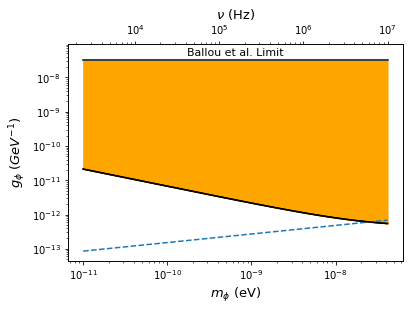

In [92]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

OSQAR=np.ones(len(nu))*3.2E-8
CAST=np.ones(len(nu))*.66E-10
SN=np.ones(len(nu))*5.3E-12
some_up_thing=np.ones(len(nu))*5.0E-8
m_a=(4.135667696E-15)*nu

ax1.loglog(m_a, g_s, 'k')
ax1.loglog(m_a,OSQAR,'k')
ax1.loglog(m_a,mag_lim,'--')

# Plot Astronomical Limits
# ax1.loglog(m_a,2*CAST,color='purple',linestyle='-.')
# ax1.loglog(m_a,2*SN,color='green',linestyle='-.')
# ax1.loglog(m_a,CAST,color='darkblue',linestyle='-.')



ax1.fill_between(m_a,g_s,OSQAR,color='orange')
ax1.fill_between(m_a,OSQAR,some_up_thing,color='white')
# ax1.fill_between(m_a,g_s,mag_lim,color='white')

ax1.set_xlabel('$m_\phi$ (eV)',size=13)
ax1.set_ylabel('$g_\phi$ ($GeV^{-1}$)',size=13)


ax2.loglog(nu, g_s,'k') # Create a dummy plot
ax2.set_xlabel('$\\nu$ (Hz)',size=13)


ax1.text(0.5, 0.98, 'Ballou et al. Limit',
        verticalalignment='top', horizontalalignment='center',
        transform=ax1.transAxes,
        color='black', fontsize=11)

# Label Astronomical Limits
# ax1.text(0.077, 0.521, 'CAST',
#         verticalalignment='center', horizontalalignment='center',
#         transform=ax1.transAxes,
#         color='black', fontsize=8)
# ax1.text(0.093, .475, 'HB star',
#         verticalalignment='center', horizontalalignment='center',
#         transform=ax1.transAxes,
#         color='black', fontsize=8)
# ax1.text(0.11, 0.35, 'SN 1987A',
#         verticalalignment='center', horizontalalignment='center',
#         transform=ax1.transAxes,
#         color='black', fontsize=8)


plt.show()

In [93]:
def B_d(Q,N_d,N_l,L,r_d,g_num,E_o,rho,r_e,d,l):
    return 2.08E-20*(Q/1.0E4)*N_d*N_l*(1/L)*(1/r_d)*(g_num/1.0E-12)*(E_o/10)*np.sqrt(rho)*r_e**2*d*np.log(1+l/r_e)

In [94]:
deltaIT=I_T(nu,L,Q,T,Delta_nu)
deltaIB=I_B(N_d_a,r_d,B_n,Delta_nu)
Isig=I(Q,L,N_l,gex,E_o,rho,r_e,d,l)
BBB=B_d(Q,N_d_a,N_l,L,r_d,g_s,E_o,rho,r_e,d,l)
# sigton=sig_to_noise(nu,L,Q,T,Delta_nu,N_d_a,r_d,B_n,N_l,g_s,E_o,rho,r_e,d,l)

NameError: name 'sig_to_noise' is not defined